In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

archivo = 'Clinica.csv'
data = pd.read_csv(archivo) # Leemos el archivo CSV

data['FechaNacimiento'] = pd.to_datetime(data['FechaNacimiento'], errors='coerce')
data['FechaInicioCarrera'] = pd.to_datetime(data['FechaInicioCarrera'], errors='coerce')

# Calcular años de experiencia para Médicos
current_date = datetime.datetime.now()
data['AñosExperiencia'] = data['FechaInicioCarrera'].apply(
    lambda x: (current_date.year - x.year) if pd.notnull(x) else None
)


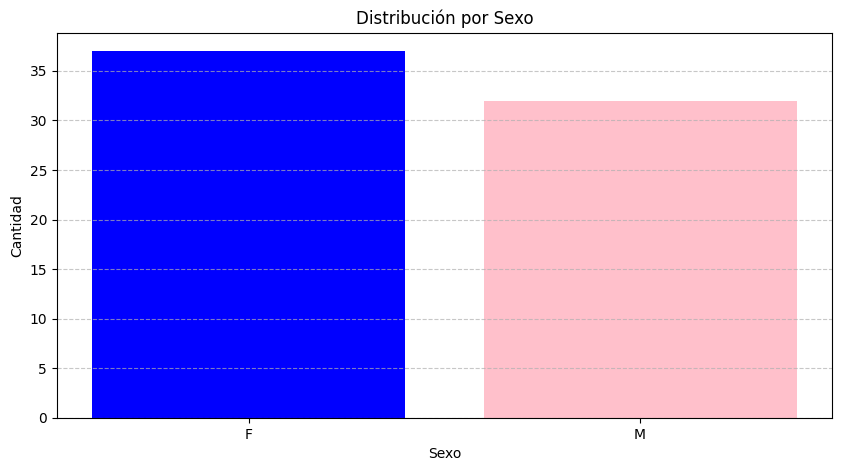

In [32]:

# Gráfica 1: Distribución por Sexo

sexo_counts = data['Sexo'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(sexo_counts.index, sexo_counts.values, color=['blue', 'pink'])

plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

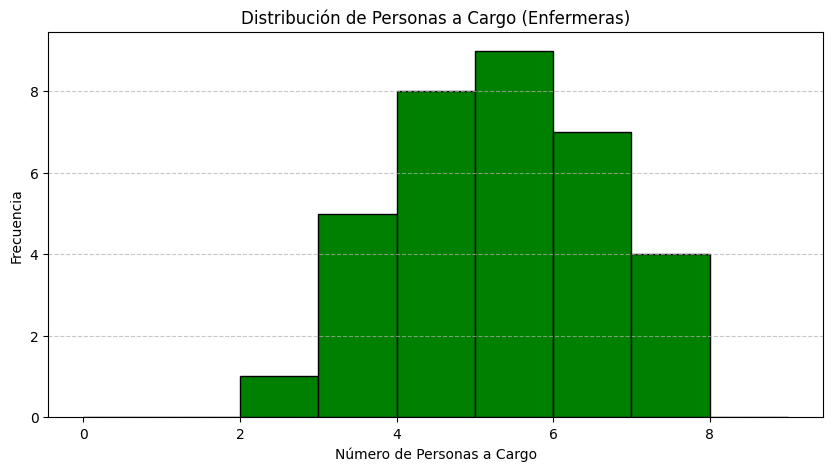

In [33]:
# Gráfica 2: Personas a Cargo (Enfermeras)

# Filtramos las enfermeras
enfermeras = data[data['Tipo'] == 'Enfermera']

plt.figure(figsize=(10, 5))
plt.hist(enfermeras['PersonasCargo'].dropna(), bins=range(0, 10), color='green', edgecolor='black') # Ignoramos los valores nulos

plt.title('Distribución de Personas a Cargo (Enfermeras)')
plt.xlabel('Número de Personas a Cargo')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<Figure size 1000x500 with 0 Axes>

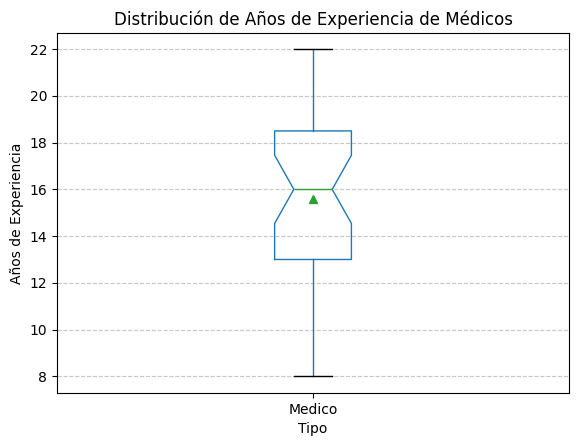

In [34]:
# Gráfica 3: Años de Experiencia por Persona

medicos = data[data['Tipo'] == 'Medico'] # Filtramos los Médicos

plt.figure(figsize=(10, 5))
medicos.boxplot(column='AñosExperiencia', by = 'Tipo', grid=False, showmeans=True, notch=True)

plt.title('Distribución de Años de Experiencia de Médicos')
plt.suptitle('') # Elimina el subtitulo
plt.ylabel('Años de Experiencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()